In [6]:
# Setting up
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [7]:
# Reading in the data
ACLED_Europe_filepath = r"C:\Users\efras\OneDrive\Documents\Personal\Data and Analysis\1900-01-01-2020-07-13-Europe-ACLED.csv"
ACLED_Europe_data = pd.read_csv(ACLED_Europe_filepath)
ACLED_Europe_data.head()

,data_id,iso,event_id_cnty,event_id_no_cnty,event_date,year,time_precision,event_type,sub_event_type,actor1,...,location,latitude,longitude,geo_precision,source,source_scale,notes,fatalities,timestamp,iso3
0,7154979,100,BGR980,980,04-Jul-20,2020,1,Protests,Peaceful protest,Protesters (Bulgaria),...,Ruse,43.8564,25.9708,2,Fakti.bg; Bulgarian News Agency,National,"On 4 July 2020, residents blocked the road fro...",0,1594154156,BGR
1,7154989,300,GRC2054,2054,04-Jul-20,2020,1,Riots,Mob violence,Rioters (Greece),...,Athens-Central Athens,37.9685,23.7585,1,To Vima; Ekathimerini; AMNA,National,"On 4 July 2020, early in the morning, about 15...",0,1594154156,GRC
2,7155009,643,RUS4610,4610,04-Jul-20,2020,1,Protests,Protest with intervention,Protesters (Russia),...,Pskov,57.8136,28.3496,1,DW; RFE/RL; MBK Media; Moskovskij Komsomolets,National-Regional,"On 4 July 2020, police detained at least 2 out...",0,1594154156,RUS
3,7155010,643,RUS4611,4611,04-Jul-20,2020,1,Protests,Peaceful protest,Protesters (Russia),...,Moscow-Central,55.7571,37.6173,1,Activatica; Rosbalt; RFE/RL; Echo Moscow,Other-National,"On 4 July 2020, between 100 and 500 people too...",0,1594154156,RUS
4,7155012,804,UKR38961,38961,04-Jul-20,2020,1,Explosions/Remote violence,Shelling/artillery/missile attack,Military Forces of Ukraine (2019-),...,Holubivske,48.6920,38.6036,2,LPR People's Militia Press Service; OSCE SMM-U...,Other,"On 4 July 2020, the Ukrainian Forces fired 120...",0,1594154156,UKR


# Initial Exploration

In [8]:
# Shorten some names for easier graphing
ACLED_Europe_data = ACLED_Europe_data.replace(['Bosnia and Herzegovina', 'North Macedonia'], ['B & H', 'N. Macedonia'])

First, I want to get an idea of what type of events occur most often, and what countries they most frequently occur in.

Text(0.5, 1.0, 'ACLED Events in the Balkans and Eastern Europe by Country, 2018-2020')

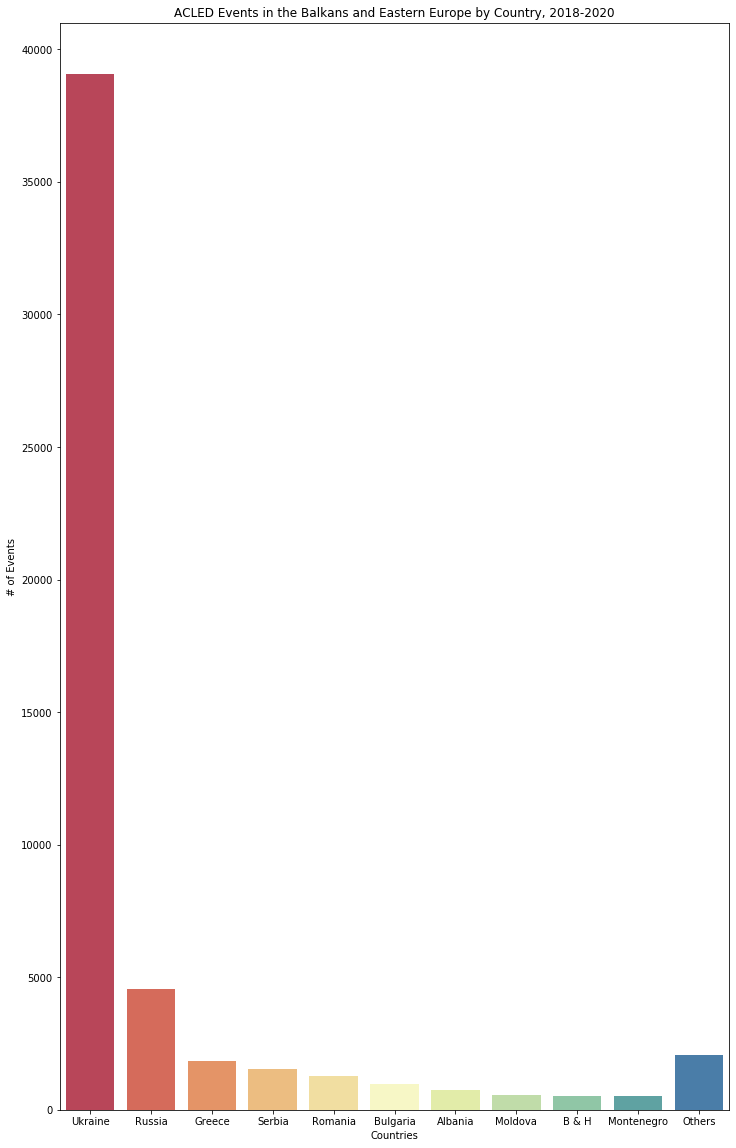

In [35]:
# Bar graph of country representation
# Get country count
country_count = ACLED_Europe_data.country.value_counts()
# Turn all countries represented less than 500 times into an 'other' category
country_count_under_500 = country_count.loc[country_count < 500]
country_count = country_count.loc[country_count >= 500]
country_count_others = pd.Series([country_count_under_500.sum()], index=['Others'])
country_count = pd.concat([country_count, country_count_others])
# Graph it
plt.figure(figsize=(12, 20))
sns.barplot(x=country_count.index, y=country_count, palette='Spectral')
plt.xlabel('Countries')
plt.ylabel('# of Events')
plt.title('ACLED Events in the Balkans and Eastern Europe by Country, 2018-2020')

Text(0.5, 1.0, 'ACLED Events in the Balkans and Eastern Europe, 2018-2020')

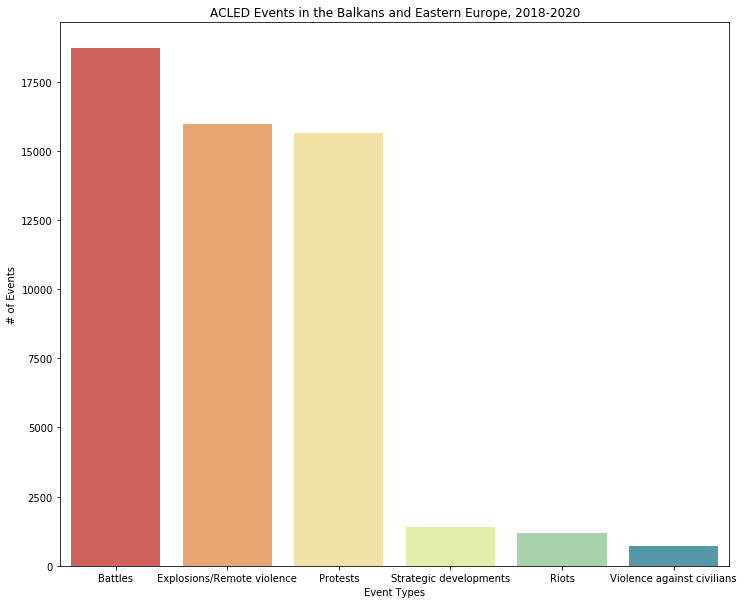

In [10]:
# Bar graph of different types of events
# Get event count
event_type_count = ACLED_Europe_data.event_type.value_counts()
# Graph it
plt.figure(figsize=(12, 10))
sns.barplot(x=event_type_count.index, y=event_type_count, palette='Spectral')
plt.xlabel('Event Types')
plt.ylabel('# of Events')
plt.title('ACLED Events in the Balkans and Eastern Europe by Event Type, 2018-2020')

The Ukraine Crisis and the War in Donbass have a dramatic impact, as Ukraine is by far the most frequently represented in the data set. This conflict likely also accounts for the frequency of battles. Focusing on the Ukraine conflict may be a promising first step.

# The Ukraine Conflict